In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

#### Importo il dataset MNIST

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()
train_images = train_images.reshape(60000, 28, 28, 1)
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape(10000, 28, 28, 1)
test_images = test_images.astype('float32') / 255

train_labels = tf.keras.utils.to_categorical(train_labels)

test_labels = tf.keras.utils.to_categorical(test_labels)

#### Mescolo il dataset di train e test

In [3]:
ids = [i for i in range(len(train_images))]
np.random.shuffle(ids)
train_images = train_images[ids, :, :, :]
train_labels = train_labels[ids, :]

train_images = train_images[:20000]
train_labels = train_labels[:20000]

ids = [i for i in range(len(test_images))]
np.random.shuffle(ids)
test_images = test_images[ids, :, :, :]
test_labels = test_labels[ids, :]

test_images = test_images[:500]
test_labels = test_labels[:500]

#### Architettura del modello

In [4]:
def get_network():
    my_network = tf.keras.models.Sequential()
    my_network.add(tf.keras.layers.Conv2D(16, kernel_size=(3, 3), activation='swish', padding='same', input_shape=(28, 28, 1)))
    my_network.add(tf.keras.layers.Dropout(0.5))
    my_network.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
    my_network.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='swish'))
    my_network.add(tf.keras.layers.Dropout(0.5))
    my_network.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
    my_network.add(tf.keras.layers.Flatten())
    my_network.add(tf.keras.layers.Dense(32, activation='swish'))
    my_network.add(tf.keras.layers.Dense(10, activation='softmax'))
    return my_network

my_network = get_network()
my_network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 dropout (Dropout)           (None, 28, 28, 16)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 32)        4640      
                                                                 
 dropout_1 (Dropout)         (None, 12, 12, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                    

#### Funzione di visualizzazione dei log di addestramento ogni 5 epoche

In [5]:
def print_after_n_epoch(epoch, logs):
    if (epoch + 1) % 25 == 0:
        print('Epoca', epoch + 1, 'Loss:', logs['loss'], '  Acc:', logs['accuracy'], 'Val_loss:', logs['val_loss'], '  Val_acc:', logs['val_accuracy'])

print_callback = tf.keras.callbacks.LambdaCallback(on_epoch_end=print_after_n_epoch)

#### Addestramento del modello

In [6]:
my_network.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

only_adam = my_network.fit(
    train_images,
    train_labels,
    batch_size=1024,
    epochs=1000,
    verbose=0,
    validation_data=(test_images, test_labels),
    callbacks=print_callback
)

Epoca 25 Loss: 0.4020351767539978   Acc: 0.8561499714851379 Val_loss: 0.6858475804328918   Val_acc: 0.7519999742507935
Epoca 50 Loss: 0.33231115341186523   Acc: 0.8790000081062317 Val_loss: 0.5518260598182678   Val_acc: 0.8420000076293945
Epoca 75 Loss: 0.2909744679927826   Acc: 0.890999972820282 Val_loss: 0.480478435754776   Val_acc: 0.8700000047683716
Epoca 100 Loss: 0.2596568167209625   Acc: 0.9046000242233276 Val_loss: 0.43507230281829834   Val_acc: 0.878000020980835
Epoca 125 Loss: 0.24135495722293854   Acc: 0.9103500247001648 Val_loss: 0.4128932058811188   Val_acc: 0.8600000143051147
Epoca 150 Loss: 0.2251604199409485   Acc: 0.9143999814987183 Val_loss: 0.4065682291984558   Val_acc: 0.8539999723434448
Epoca 175 Loss: 0.20962639153003693   Acc: 0.9211000204086304 Val_loss: 0.37199509143829346   Val_acc: 0.8679999709129333
Epoca 200 Loss: 0.19765986502170563   Acc: 0.92535001039505 Val_loss: 0.3681100010871887   Val_acc: 0.8640000224113464
Epoca 225 Loss: 0.18241173028945923   Acc:

#### Illustrazione di Loss e Accuracy in addestramento

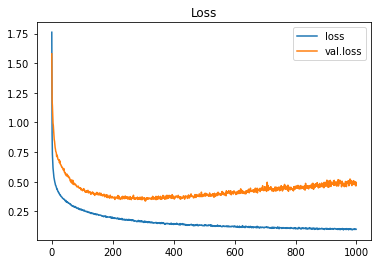

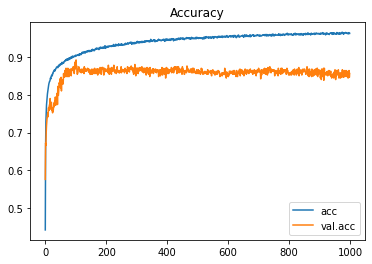

--- valutazione modello ---
16/16 [==============================] - 0s 8ms/step - loss: 0.4671 - accuracy: 0.8560


[0.46708470582962036, 0.8560000061988831]

In [7]:
plt.plot(only_adam.history['loss'], label='loss')
plt.plot(only_adam.history['val_loss'], label='val.loss')
plt.title('Loss')
plt.legend()
plt.show()

plt.plot(only_adam.history['accuracy'], label='acc')
plt.plot(only_adam.history['val_accuracy'], label='val.acc')
plt.title('Accuracy')
plt.legend()
plt.show()

print('--- valutazione modello ---')
my_network.evaluate(test_images, test_labels)

#### Salvo i pesi e li ricarico per riaddestrare il modello con Standard Gradient Discent 
in modo tale possiamo notare che continuare un addestramento con la SGD puo massimizzare le previsioni del modello 

In [8]:
my_network = get_network()
my_network.summary()

my_network.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

adam_n_sgd_1 = my_network.fit(
    train_images,
    train_labels,
    batch_size=1024,
    epochs=850,
    verbose=0,
    validation_data=(test_images, test_labels),
    callbacks=print_callback
)

my_network.save_weights('weights/weights')

my_network.compile(
    optimizer='sgd',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

my_network.load_weights('weights/weights')

adam_n_sgd_2 = my_network.fit(
    train_images,
    train_labels,
    batch_size=1024,
    epochs=1000,
    initial_epoch=850,
    verbose=0,
    validation_data=(test_images, test_labels),
    callbacks=print_callback
)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 dropout_2 (Dropout)         (None, 28, 28, 16)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 32)        4640      
                                                                 
 dropout_3 (Dropout)         (None, 12, 12, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                  

#### Illustrazione Loss e Accuracy durante l'addestramento

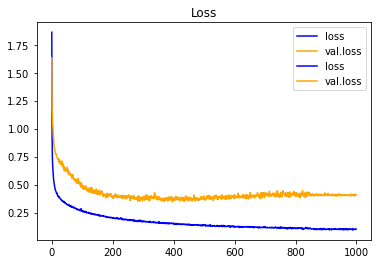

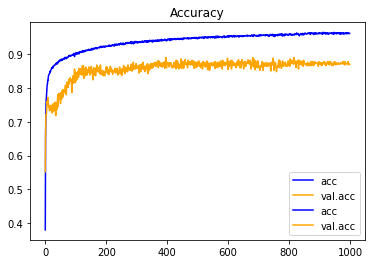

--- valutazione modello ---
16/16 [==============================] - 0s 3ms/step - loss: 0.4078 - accuracy: 0.8700


[0.4077654480934143, 0.8700000047683716]

In [9]:
x_1 = [i for i, x in enumerate(adam_n_sgd_1.history['loss'])]
x_2 = [850 + i for i, x in enumerate(adam_n_sgd_2.history['loss'])]

plt.plot(x_1, adam_n_sgd_1.history['loss'], label='loss', color='blue')
plt.plot(x_1, adam_n_sgd_1.history['val_loss'], label='val.loss', color='orange')
plt.plot(x_2, adam_n_sgd_2.history['loss'], label='loss', color='blue')
plt.plot(x_2, adam_n_sgd_2.history['val_loss'], label='val.loss', color='orange')
plt.title('Loss')
plt.legend()
plt.show()

plt.plot(x_1, adam_n_sgd_1.history['accuracy'], label='acc', color='blue')
plt.plot(x_1, adam_n_sgd_1.history['val_accuracy'], label='val.acc', color='orange')
plt.plot(x_2, adam_n_sgd_2.history['accuracy'], label='acc', color='blue')
plt.plot(x_2, adam_n_sgd_2.history['val_accuracy'], label='val.acc', color='orange')
plt.title('Accuracy')
plt.legend()
plt.show()

print('--- valutazione modello ---')
my_network.evaluate(test_images, test_labels)